In [1]:
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from scipy import ndimage
import math

from PIL import Image, ImageDraw

SIZE = 500

#image = Image.open("./dogbone.jpg")
#image = image.resize((SIZE,SIZE))
#image = np.asarray(image)
#image = np.mean(image,-1)
#image[image < 100]=0
#image[image > 100]=1

image = Image.new('RGB', (SIZE,SIZE) , color = 'white')
draw = ImageDraw.Draw(image)
draw.ellipse((SIZE*.4/2, SIZE*.4/2, SIZE*1.6/2, SIZE*1.6/2), fill='black', outline='black')
draw.ellipse((SIZE*.7/2, SIZE*.7/2, SIZE*1.3/2, SIZE*1.3/2), fill='white', outline='white')
image = np.asarray(np.mean(image,-1))
image[image > 1]=1

distance = ndimage.distance_transform_edt(image)

# create circle mask
imgmask = Image.new('RGB',  image.shape , color = (0,0,0))
draw = ImageDraw.Draw(imgmask)
width, height = imgmask.size
draw.ellipse((0, 0, width, height), fill='white', outline='white')
imgmask = np.asarray(np.mean(imgmask,-1))
imgmask[imgmask > 0]=1

# mask off circle pixels
distance = distance * np.array(imgmask)
max = distance.max()
distance = distance/max

# this is for checkpoint display only
plt.figure(figsize=(12,12))
lines = plt.contour(distance, 10)
plt.axis('off')
plt.show()

<Figure size 1200x1200 with 1 Axes>

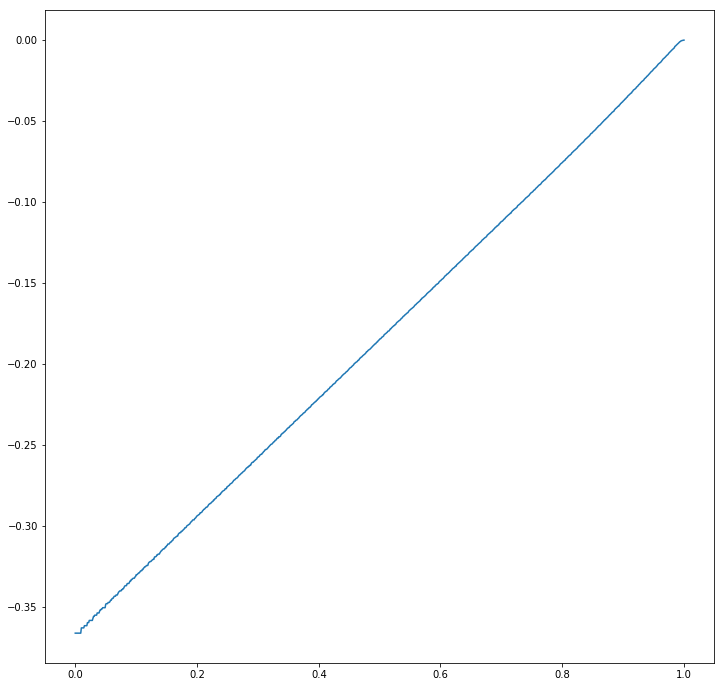

In [6]:
# create burn distance space
lnspc = np.linspace(0,1,1000)

original_volume = 2*math.pi*((SIZE/2)**2)
count_with_threshhold = lambda x: distance[distance > x].size
burnrate_values = np.array([count_with_threshhold(x) for x in lnspc]).astype(float)
burnrate_values = -burnrate_values/original_volume

plt.figure(figsize=(12,12))
plt.plot(lnspc,burnrate_values)
plt.show()

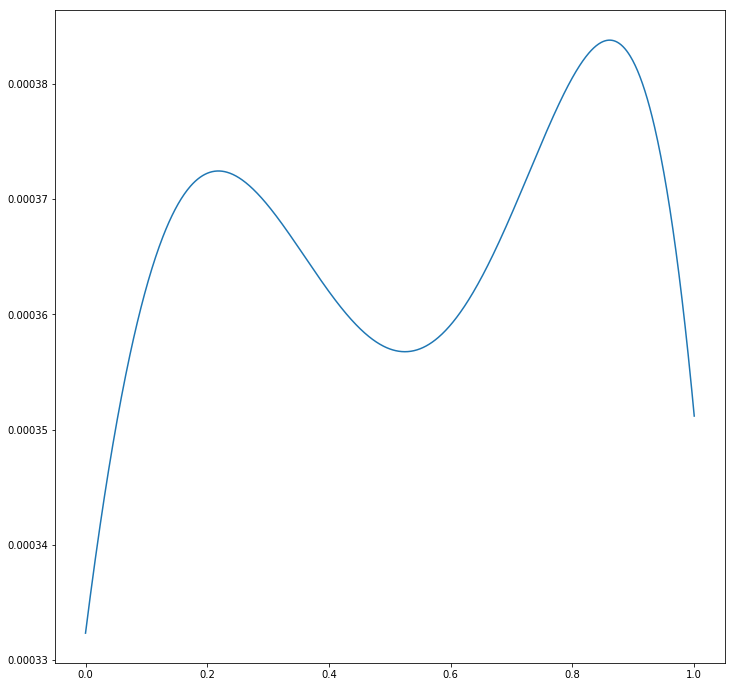

In [7]:
v = np.polyfit(lnspc[1:],np.diff(burnrate_values),5)

plt.figure(figsize=(12,12))
plt.plot(lnspc,np.polyval(v,lnspc))
plt.show()